# World Water Toolbox

This is an example of the processing chain of using the World Water Toolbox with the openEO Platform. 
The Processing chain is divided to 3 main sub-flows.

- Import libraries

In [3]:
import numpy as np

import pathlib
from datetime import datetime
from dateutil.relativedelta import *
import matplotlib
import openeo

from openeo.extra.spectral_indices.spectral_indices import append_index
from openeo.processes import exp, array_element,log, count,normalized_difference, gte, eq, neq, sum
from openeo.processes import if_
import xarray as xr

connection = openeo.connect("openeo-dev.vito.be").authenticate_oidc()  #openeo.cloud


Authenticated using refresh token.


In [14]:
start_date           = '2021-06-01'
spatial_extent       = {'west': -74.5, 'east': -73, 'south': 4.5, 'north': 5, 'crs': 'epsg:4326'} #colombia

## Get the Sentinel-2 data for a 3 month window.
start_date_dt_object = datetime.strptime(start_date, '%Y-%m-%d')
end_date             = (start_date_dt_object + relativedelta(months = +1)).date() ## End date, 1 month later (1st Feb. 2021)
start_date_exclusion = (start_date_dt_object + relativedelta(months = -1)).date() ## exclusion date, to give a 3 month window.

bands                = ['B02', 'B03', 'B04', 'B08', 'CLP', 'SCL' , 'sunAzimuthAngles', 'sunZenithAngles'] 

s2_cube_scale = connection.load_collection(
    'SENTINEL2_L2A_SENTINELHUB',
    spatial_extent  = spatial_extent,
    temporal_extent = [start_date_exclusion, end_date],
    bands           = bands)


job_options = {
        "tile_grid": "utm-50km",
        "executor-memory": "10G",
        "executor-memoryOverhead": "10G",
        "executor-cores": "4"}

s2_cube_scale_save = s2_cube_scale.save_result(format='netCDF') #GTiff #netCDF
my_job  = s2_cube_scale_save .send_job(title="s2_cube_scale", job_options=job_options)
results = my_job.start_and_wait().get_results()
results.download_files("s2_cube_scale") 


C:\Users\ansu\AppData\Local\Temp\ipykernel_6216\3583643964.py:25: DeprecationWarning: Call to deprecated method `send_job`, use `create_job` instead.
  my_job  = s2_cube_scale_save .send_job(title="s2_cube_scale", job_options=job_options)


0:00:00 Job 'j-dbbe46233f1a438a8e6d03014262e98a': send 'start'
0:00:34 Job 'j-dbbe46233f1a438a8e6d03014262e98a': queued (progress N/A)
0:00:39 Job 'j-dbbe46233f1a438a8e6d03014262e98a': queued (progress N/A)
0:00:46 Job 'j-dbbe46233f1a438a8e6d03014262e98a': queued (progress N/A)
0:00:54 Job 'j-dbbe46233f1a438a8e6d03014262e98a': queued (progress N/A)
0:01:04 Job 'j-dbbe46233f1a438a8e6d03014262e98a': queued (progress N/A)
0:01:17 Job 'j-dbbe46233f1a438a8e6d03014262e98a': queued (progress N/A)
0:01:32 Job 'j-dbbe46233f1a438a8e6d03014262e98a': queued (progress N/A)
0:01:52 Job 'j-dbbe46233f1a438a8e6d03014262e98a': queued (progress N/A)
0:02:16 Job 'j-dbbe46233f1a438a8e6d03014262e98a': queued (progress N/A)
0:02:46 Job 'j-dbbe46233f1a438a8e6d03014262e98a': queued (progress N/A)
0:03:24 Job 'j-dbbe46233f1a438a8e6d03014262e98a': queued (progress N/A)
0:04:11 Job 'j-dbbe46233f1a438a8e6d03014262e98a': queued (progress N/A)
0:05:09 Job 'j-dbbe46233f1a438a8e6d03014262e98a': queued (progress N/A)
0

[WindowsPath('s2_cube_scale/openEO.nc'),
 WindowsPath('s2_cube_scale/job-results.json')]

In [4]:
ds = xr.load_dataset("s2_cube_scale/openEO.nc")
ds


<xarray.Dataset>
Dimensions:           (t: 24, x: 16650, y: 5560)
Coordinates:
  * t                 (t) datetime64[ns] 2021-05-03 2021-05-05 ... 2021-06-29
  * x                 (x) float64 5.554e+05 5.554e+05 ... 7.219e+05 7.219e+05
  * y                 (y) float64 5.53e+05 5.53e+05 ... 4.974e+05 4.974e+05
Data variables:
    crs               |S1 b''
    B02               (t, y, x) float32 
    B03               (t, y, x) float32 
    B04               (t, y, x) float32 
    B08               (t, y, x) float32 
    CLP               (t, y, x) float32 
    SCL               (t, y, x) float32 
    sunAzimuthAngles  (t, y, x) float32 
    sunZenithAngles   (t, y, x) float32 
Attributes:
    Conventions:  CF-1.8
    institution:  openEO platform - Geotrellis backend: 0.6.4a1
    description:  
    title:

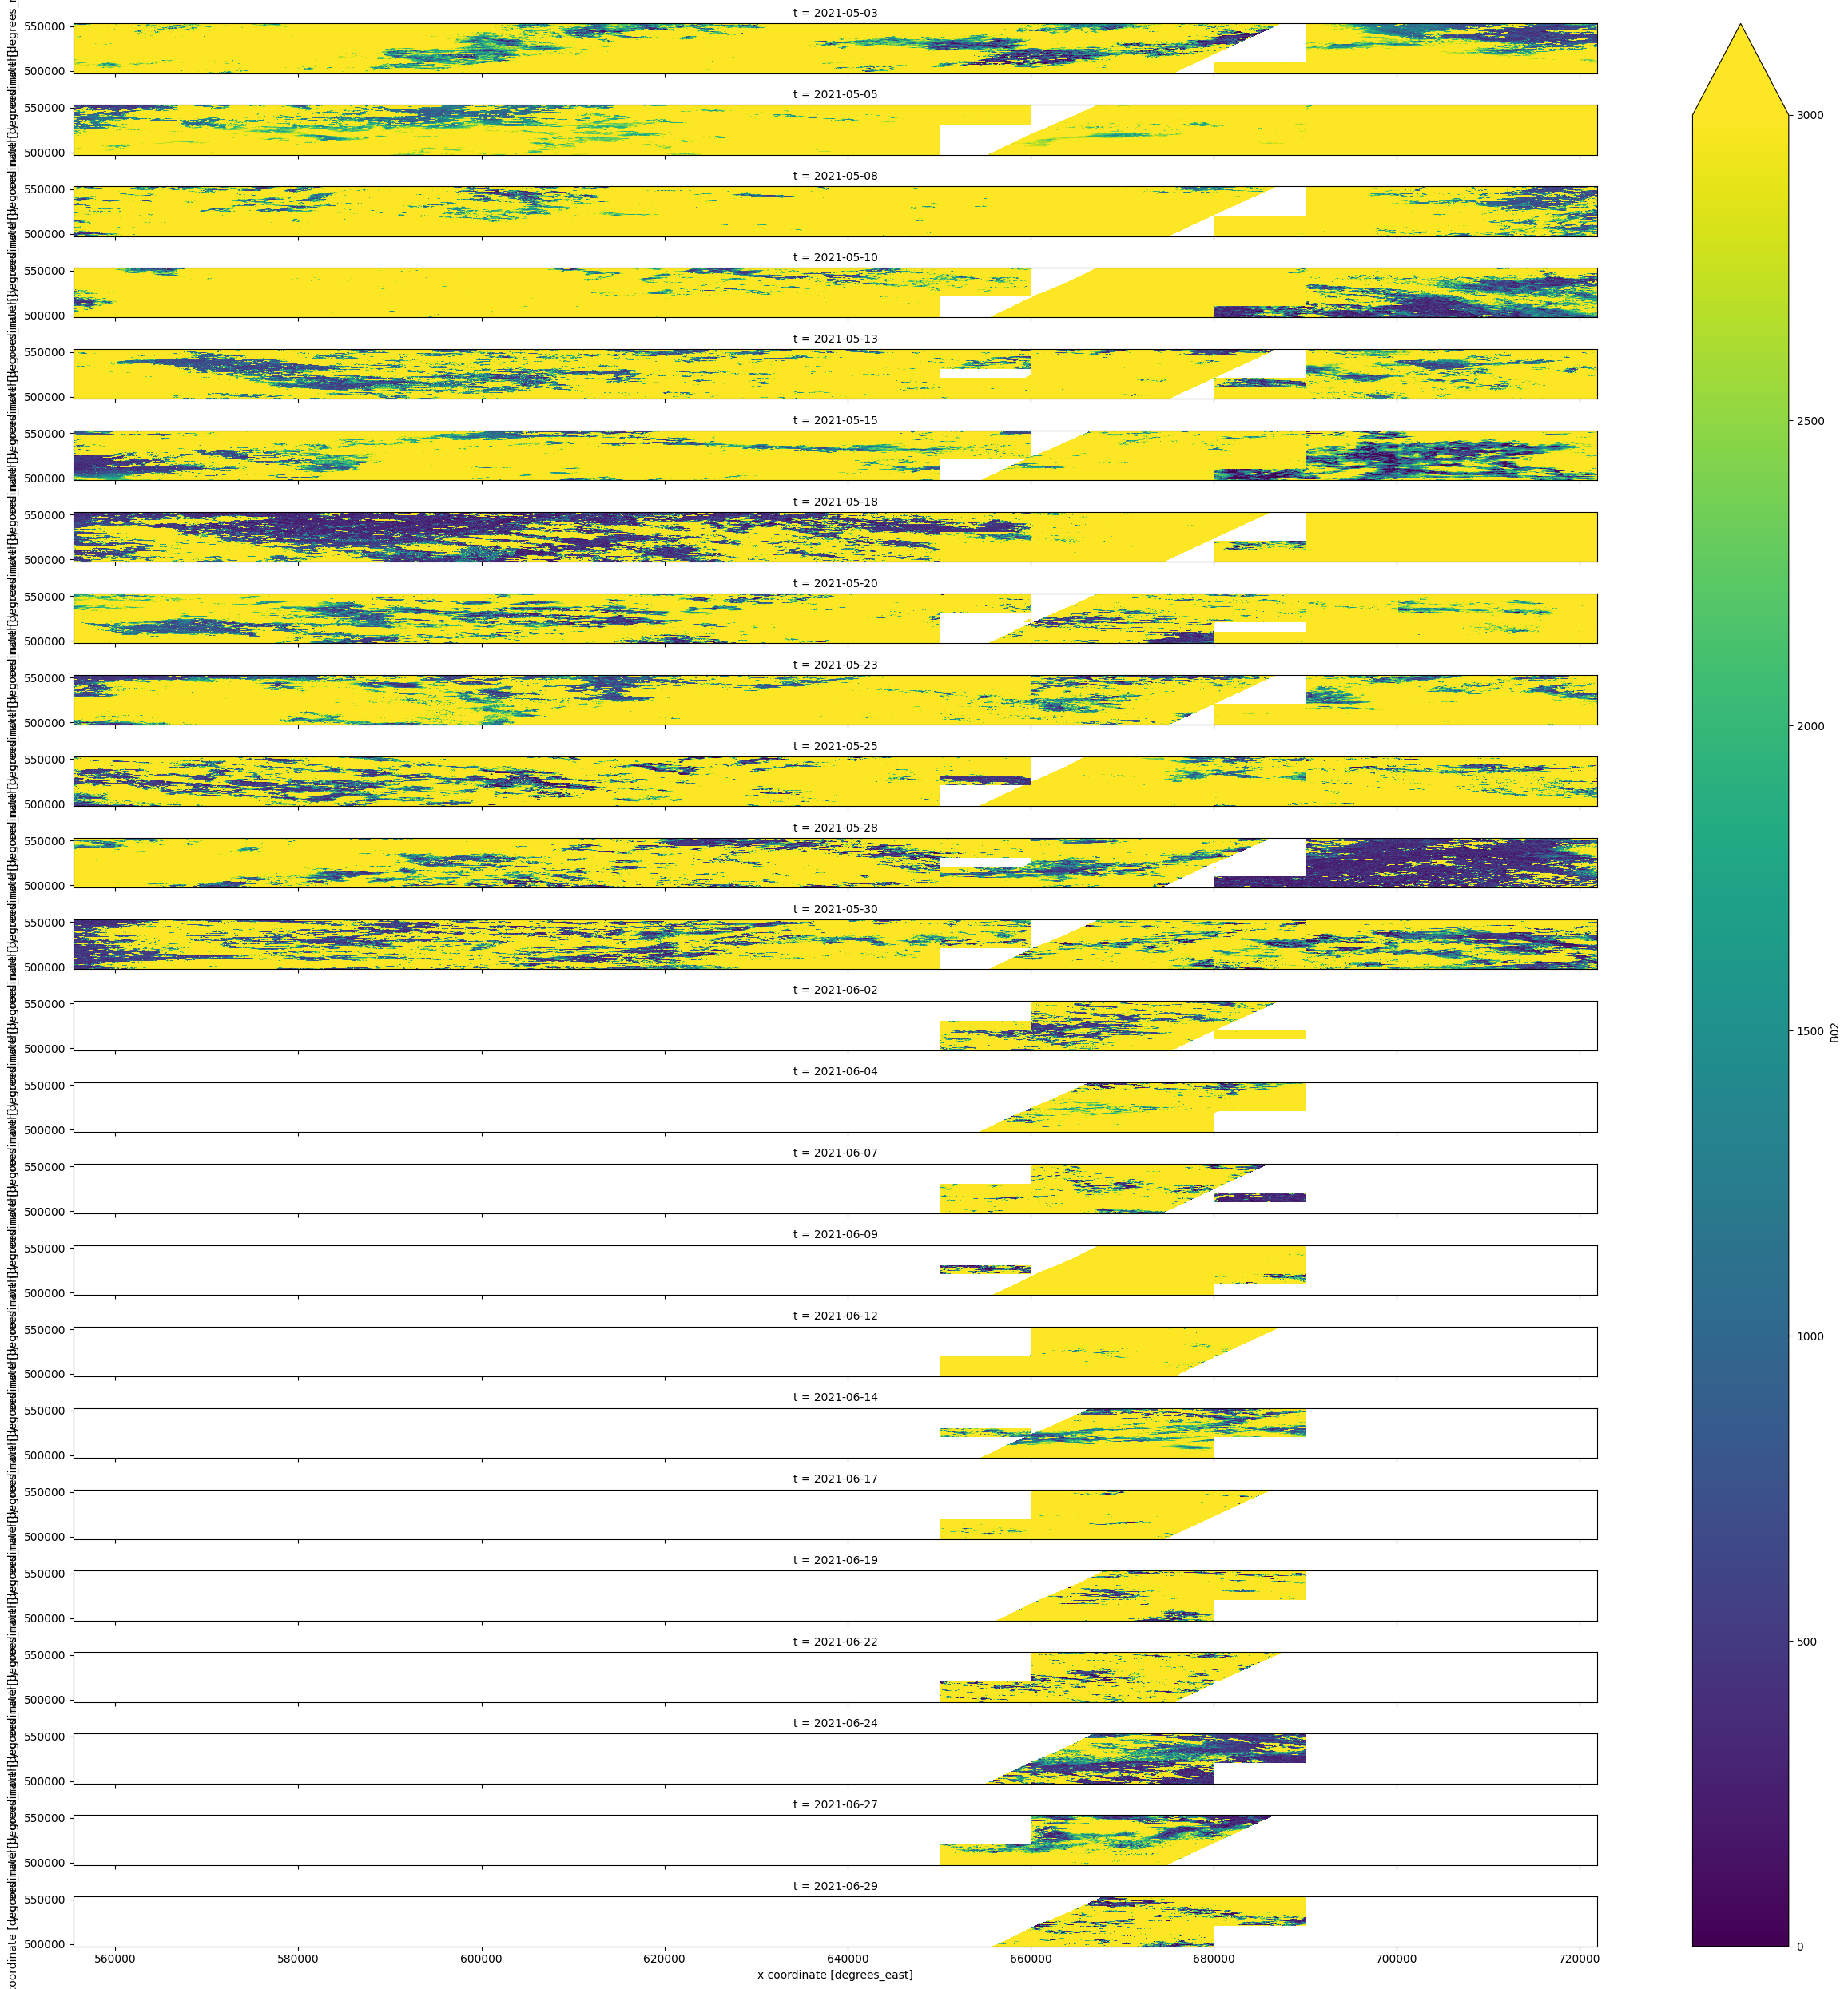

In [6]:
ds["B02"].plot.imshow(row="t", figsize=(25,25), vmin=0, vmax=3000)



# Bigger boundaries